In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline

In [34]:
column_names=["user_id","item_id","rating","timestamp"]
df=pd.read_csv("u.data",sep="\t",names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [35]:
movie_title=pd.read_csv("movies.csv")
movie_title.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [36]:
movie_title=movie_title.rename(columns={"movieId":"item_id"})

In [37]:
movie_title.head()

,item_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [38]:
df=pd.merge(df,movie_title,on="item_id")
df

,user_id,item_id,rating,timestamp,title,genres
0,0,50,5,881250949,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
1,290,50,5,880473582,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
2,79,50,4,891271545,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
3,2,50,5,888552084,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
4,8,50,5,879362124,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
80405,655,1645,4,892871225,The Devil's Advocate (1997),Drama|Mystery|Thriller
80406,747,1659,1,888733313,Hurricane Streets (1997),Drama
80407,916,1682,3,880845755,"Truman Show, The (1998)",Comedy|Drama|Sci-Fi
80408,840,1674,4,891211682,Witness (1985),Drama|Romance|Thriller


# Lets create a dataframe with average rating

In [39]:
df.groupby("title")["rating"].mean().sort_values(ascending=False).head()

title
Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)    5.0
Steel (1997)                                                                 5.0
Thin Blue Line, The (1988)                                                   5.0
Grosse Pointe Blank (1997)                                                   5.0
Gattaca (1997)                                                               5.0
Name: rating, dtype: float64

In [40]:
df.groupby("title")["rating"].count().sort_values(ascending=False).head()

title
Usual Suspects, The (1995)                        584
Kid in King Arthur's Court, A (1995)              509
City Hall (1996)                                  508
Mighty Morphin Power Rangers: The Movie (1995)    507
Perez Family, The (1995)                          485
Name: rating, dtype: int64

In [43]:
ratings=pd.DataFrame(df.groupby("title")["rating"].mean().sort_values(ascending=False))
ratings.head()

,rating
title,
"Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)",5.0
Steel (1997),5.0
"Thin Blue Line, The (1988)",5.0
Grosse Pointe Blank (1997),5.0
Gattaca (1997),5.0


In [46]:
ratings["no of ratings"]=df.groupby("title")["rating"].count().sort_values()

In [48]:
ratings.head()

,rating,no of counts,no of ratings
title,,,
"Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)",5.0,1,1
Steel (1997),5.0,1,1
"Thin Blue Line, The (1988)",5.0,3,3
Grosse Pointe Blank (1997),5.0,2,2
Gattaca (1997),5.0,1,1


(array([393., 123.,  87.,  79.,  53.,  67.,  39.,  48.,  34.,  21.,  27.,
         18.,  18.,  19.,  24.,  26.,  12.,  13.,  11.,  11.,  19.,  10.,
          6.,   8.,   8.,   6.,  11.,   5.,   3.,   6.,   9.,   4.,   3.,
          6.,   2.,  11.,   2.,   3.,   2.,   2.,   1.,   3.,   0.,   1.,
          1.,   2.,   1.,   0.,   0.,   0.,   1.,   2.,   0.,   0.,   1.,
          0.,   0.,   1.,   1.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.]),
 array([  1.        ,   9.32857143,  17.65714286,  25.98571429,
         34.31428571,  42.64285714,  50.97142857,  59.3       ,
         67.62857143,  75.95714286,  84.28571429,  92.61428571,
        100.94285714, 109.27142857, 117.6       , 125.92857143,
        134.25714286, 142.58571429, 150.91428571, 159.24285714,
        167.57142857, 175.9       , 184.22857143, 192.55714286,
        200.88571429, 209.21428571, 217.54285714, 225.87142857,
        234.2       , 242.52857143, 250.85714286, 259.18571429,
        26

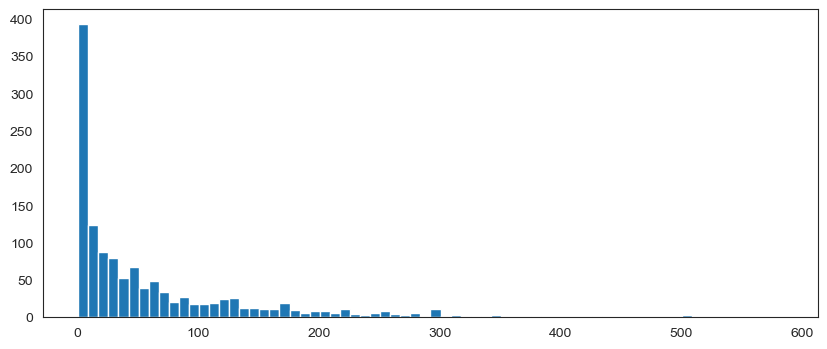

In [54]:
figure=plt.figure(figsize=(10,4))
plt.hist(ratings["no of ratings"],bins=70)

(array([51.,  0.,  1.,  0.,  1.,  3.,  0.,  1., 10.,  0.,  2.,  6.,  2.,
         2.,  8.,  3.,  4., 41.,  2.,  5., 13., 20., 12., 14., 26., 12.,
        36., 17., 21., 36., 34., 26., 30., 28.,  7., 94., 25., 45., 37.,
        30., 38., 25., 40., 46., 36., 38., 38., 27., 35., 38., 29., 32.,
        48., 18., 22., 12., 13.,  7.,  5.,  1.,  3.,  5.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  6.]),
 array([1.        , 1.05714286, 1.11428571, 1.17142857, 1.22857143,
        1.28571429, 1.34285714, 1.4       , 1.45714286, 1.51428571,
        1.57142857, 1.62857143, 1.68571429, 1.74285714, 1.8       ,
        1.85714286, 1.91428571, 1.97142857, 2.02857143, 2.08571429,
        2.14285714, 2.2       , 2.25714286, 2.31428571, 2.37142857,
        2.42857143, 2.48571429, 2.54285714, 2.6       , 2.65714286,
        2.71428571, 2.77142857, 2.82857143, 2.88571429, 2.94285714,
        3.        , 3.05714286, 3.11428571, 3.17142857, 3.22857143,
        3.28571429, 3.34285714, 3.4       , 3.45714286, 

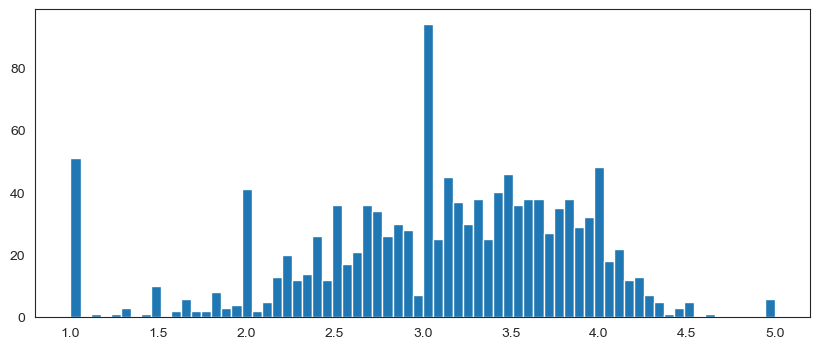

In [55]:
figure=plt.figure(figsize=(10,4))
plt.hist(ratings["rating"],bins=70)

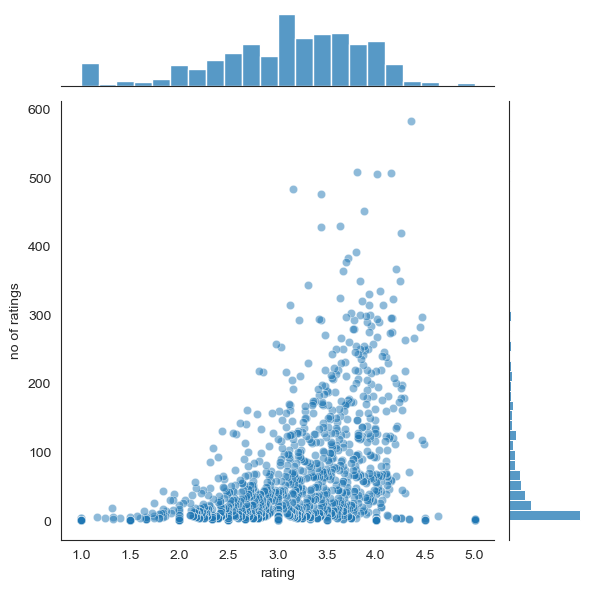

In [56]:
sns.jointplot(x='rating',y='no of ratings',data=ratings,alpha=0.5)

# Recommending Similar Movies

# Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [57]:
movie_mat=df.pivot_table(index="user_id",columns="title",values="rating")
movie_mat.head()

title,'Til There Was You (1997),1-900 (06) (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (One Eight Seven) (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"39 Steps, The (1935)",8 1/2 (8½) (1963),...,"Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (Macht der Bilder: Leni Riefenstahl, Die) (1993)","World of Apu, The (Apur Sansar) (1959)",Wyatt Earp (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
ratings.sort_values(by="no of ratings",ascending=False).head(10)

,rating,no of ratings
title,,
"Usual Suspects, The (1995)",4.359589,584
"Kid in King Arthur's Court, A (1995)",3.803536,509
City Hall (1996),4.155512,508
Mighty Morphin Power Rangers: The Movie (1995),4.007890,507
"Perez Family, The (1995)",3.156701,485
Natural Born Killers (1994),3.441423,478
Toy Story (1995),3.878319,452
Quiz Show (1994),3.631090,431
"Boys of St. Vincent, The (1992)",3.438228,429


In [59]:
ratings.head()

,rating,no of ratings
title,,
"Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)",5.0,1
Steel (1997),5.0,1
"Thin Blue Line, The (1988)",5.0,3
Grosse Pointe Blank (1997),5.0,2
Gattaca (1997),5.0,1


In [61]:
usualSuspects_user_ratings = movie_mat['Usual Suspects, The (1995)']
mighty_user_ratings = movie_mat["Mighty Morphin Power Rangers: The Movie (1995)"]
usualSuspects_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Usual Suspects, The (1995), dtype: float64

In [62]:
similar_to_usualSuspects = movie_mat.corrwith(usualSuspects_user_ratings)
similar_to_mighty = movie_mat.corrwith(mighty_user_ratings)

C:\Users\souvi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\souvi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\souvi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\souvi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [63]:
corr_usualSuspects=pd.DataFrame(similar_to_usualSuspects,columns=["Corelation"])

In [64]:
corr_usualSuspects

,Corelation
title,
'Til There Was You (1997),-0.069030
1-900 (06) (1994),-0.179605
101 Dalmatians (1996),NaN
12 Angry Men (1957),0.219846
187 (One Eight Seven) (1997),0.500000
...,...
Young Frankenstein (1974),0.177537
Young Guns (1988),0.866025
Young Guns II (1990),-0.108465


In [65]:
corr_usualSuspects.dropna(inplace=True)
corr_usualSuspects.head()

,Corelation
title,
'Til There Was You (1997),-0.069030
1-900 (06) (1994),-0.179605
12 Angry Men (1957),0.219846
187 (One Eight Seven) (1997),0.500000
2 Days in the Valley (1996),0.101015


# Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).

In [67]:
corr_usualSuspects.sort_values('Corelation',ascending=False).head(10)

,Corelation
title,
Shall We Dance? (Shall We Dansu?) (1996),1.0
Grease (1978),1.0
Sophie's Choice (1982),1.0
I Shot Andy Warhol (1996),1.0
Evita (1996),1.0
"Usual Suspects, The (1995)",1.0
Forbidden Planet (1956),1.0
Star Trek: First Contact (1996),1.0
Jaws 3-D (1983),1.0


# Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [68]:
corr_usualSuspects = corr_usualSuspects.join(ratings['no of ratings'])
corr_usualSuspects.head()

,Corelation,no of ratings
title,,
'Til There Was You (1997),-0.069030,31
1-900 (06) (1994),-0.179605,13
12 Angry Men (1957),0.219846,21
187 (One Eight Seven) (1997),0.500000,3
2 Days in the Valley (1996),0.101015,10


# Now sort the values and notice how the titles make a lot more sense:

In [69]:
corr_usualSuspects[corr_usualSuspects['no of ratings']>10].sort_values('Corelation',ascending=False).head()

,Corelation,no of ratings
title,,
"Usual Suspects, The (1995)",1.000000,584
Tie Me Up! Tie Me Down! (¡Átame!) (1990),0.750000,11
Johnny Mnemonic (1995),0.748353,368
Blood Beach (1981),0.722592,11
Mighty Morphin Power Rangers: The Movie (1995),0.672556,507
